In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:\\Users\\User\\olimpic_medals.csv')

In [3]:
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### 1. Сколько медалей выиграл Jesse Owens в 1936?

In [4]:
a=df.Athlete

In [5]:
for el in a:
    if 'Jesse' in el:
        print(el)

WOOD, Harvey Jesse
WALLINGFORD, Jesse Alfred
OWENS, Jesse
OWENS, Jesse
OWENS, Jesse
OWENS, Jesse
RENICK, John (Jesse) Bernard
MASHBURN, Jesse William
JAMES, John Jesse
VALDEZ, John (Jesse)
MAHIEU, Jesse
SMITH, Jesse
SERGENT, Jesse


In [6]:
df.loc[(df.Edition==1936) & (df.Athlete=='OWENS, Jesse')].shape[0]

4

### Ответ: 4

### 2. Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне?

In [7]:
df1=df.loc[(df.Discipline=='Badminton') & (df.Gender=='Men') & (df.Medal=='Gold')]

In [8]:
df1['NOC'].value_counts()

INA    8
KOR    6
CHN    4
DEN    1
Name: NOC, dtype: int64

### Ответ: Индонезия

### 3. Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [9]:
df1=df.loc[(df.Edition>=1984) & (df.Edition<=2008)]

In [10]:
df1['NOC'].value_counts()

USA    1837
AUS     762
GER     691
CHN     679
RUS     638
       ... 
DJI       1
URU       1
MKD       1
ISV       1
MRI       1
Name: NOC, Length: 124, dtype: int64

### Ответ: США, Австралия, Германия

### 4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша.Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [11]:
df1=df[df.Event.str.contains("100m")]
df2=df1.loc[(df1.Gender=='Men') & (df1.Medal=='Gold')]
df2[['City','Edition','Athlete','NOC']].sort_values('Edition',ascending=False)

,City,Edition,Athlete,NOC
27606,Beijing,2008,"POWELL, Asafa",JAM
27321,Beijing,2008,"CROCKER, Ian",USA
27212,Beijing,2008,"PEIRSOL, Aaron",USA
27218,Beijing,2008,"KITAJIMA, Kosuke",JPN
27224,Beijing,2008,"PHELPS, Michael",USA
...,...,...,...,...
671,St Louis,1904,"BRACK, Walter",GER
231,Paris,1900,"JARVIS, Francis",USA
13,Athens,1896,"BURKE, Thomas",USA
3,Athens,1896,"MALOKINIS, Ioannis",GRE


### 5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как многозолотых, серебрянных и бронзовых медалей было выйграно каждым полом?

In [12]:
df[['Gender','Medal']].groupby('Gender').agg(['count'])

,Medal
,count
Gender,
Men,21721
Women,7495


In [13]:
df[['Gender','Medal']].groupby(['Gender','Medal']).agg({'Medal':'count'})

Medal
Gender Medal        
Men    Bronze   7175
       Gold     7365
       Silver   7181
Women  Bronze   2514
       Gold     2485
       Silver   2496

### 6. Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.

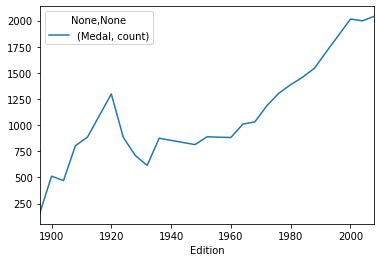

In [14]:
df[['Edition','Medal']].groupby('Edition').agg(['count']).plot()

### 7. Создайте список показывающий число всех медалей выйгранных каждой страной в течение всейистории олимпийских игр. Для каждой страны, необходимо показать год первой и последнейзаработанной медали.

In [15]:
df.groupby('NOC').agg({'Medal':'count','Edition':['min','max']})

Medal Edition      
    count     min   max
NOC                    
AFG     1    2008  2008
AHO     1    1988  1988
ALG    14    1984  2008
ANZ    29    1908  1912
ARG   239    1924  2008
..    ...     ...   ...
VIE     2    2000  2008
YUG   435    1924  2000
ZAM     2    1984  1996
ZIM    23    1980  2008
ZZX    48    1896  1904

[138 rows x 3 columns]

### 8. Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m

In [16]:
df1=df.loc[df.City=='Beijing']
df1[df1.Event.str.contains('100m|200m')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27210,Beijing,2008,Aquatics,Swimming,"STOECKEL, Hayden",AUS,Men,100m backstroke,M,Bronze
27211,Beijing,2008,Aquatics,Swimming,"VYATCHANIN, Arkady",RUS,Men,100m backstroke,M,Bronze
27212,Beijing,2008,Aquatics,Swimming,"PEIRSOL, Aaron",USA,Men,100m backstroke,M,Gold
27213,Beijing,2008,Aquatics,Swimming,"GREVERS, Matt",USA,Men,100m backstroke,M,Silver
27214,Beijing,2008,Aquatics,Swimming,"HOELZER, Margaret",USA,Women,100m backstroke,W,Bronze
...,...,...,...,...,...,...,...,...,...,...
27618,Beijing,2008,Athletics,Athletics,"POLYAKOVA, Evgeniya",RUS,Women,4x100m relay,W,Gold
27619,Beijing,2008,Athletics,Athletics,"BORLEE, Olivia",BEL,Women,4x100m relay,W,Silver
27620,Beijing,2008,Athletics,Athletics,"GEVAERT, Kim",BEL,Women,4x100m relay,W,Silver
27621,Beijing,2008,Athletics,Athletics,"MARIEN, Hanna",BEL,Women,4x100m relay,W,Silver


### 9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике.

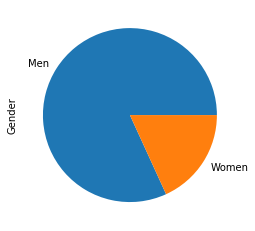

In [17]:
df.loc[(df.NOC=='USA') & (df.Sport=='Athletics')]['Gender'].value_counts().plot.pie()

### 10. Постройте график 5 атлетов которые выйграли большинство золотых медалей.

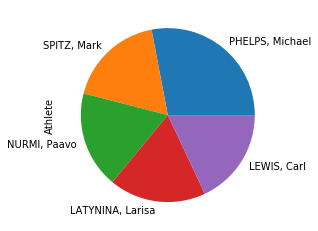

In [18]:
df.loc[df.Medal=='Gold']['Athlete'].value_counts()[:5].plot.pie()

### 11. Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх.

In [19]:
df.loc[df.Edition==df.Edition.max()].NOC.value_counts()

USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
MDA      1
EGY      1
AFG      1
PAN      1
VIE      1
Name: NOC, Length: 86, dtype: int64

### 12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год)по общему количеству медалей. Включите дисциплину атлета.

In [20]:
df1=df.loc[df.NOC=='USA'].groupby(['Edition','Athlete','Sport'])['Athlete'].count().sort_values().groupby(level=0).tail(1)

In [21]:
df1.sort_index()

Edition  Athlete                      Sport     
1896     GARRETT, Robert              Athletics     4
1900     BAXTER, Irving               Athletics     5
1904     EYSER, George                Gymnastics    6
1908     SHEPPARD, Melvin             Athletics     3
1912     OSBURN, Carl Townsend        Shooting      4
1920     LEE, Willis                  Shooting      7
1924     WEISSMULLER, Johnny          Aquatics      4
1928     LAUFER, Walter               Aquatics      2
1932     DIDRIKSON, Mildred           Athletics     3
1936     OWENS, Jesse                 Athletics     4
1948     CURTIS, Ann Elisabeth        Aquatics      3
1952     KONNO, Ford Hiroshi          Aquatics      3
1956     BREEN, George Thomas         Aquatics      3
1960     VON SALTZA, Susan Christina  Aquatics      4
1964     ELLIS, Kathleen              Aquatics      4
1968     HICKCOX, Charles Buchanan    Aquatics      4
1972     SPITZ, Mark                  Aquatics      7
1976     NABER, John Phillips    